In [2]:
# Importing the Libraries.
import requests
from PIL import Image

In [3]:
# Give the desired Pincode.

pincode = 'SW6 2EB'

The MP details for the given Postcode are:

Name : Greg Hands
Constituency : Chelsea and Fulham
Email : handsg@parliament.uk



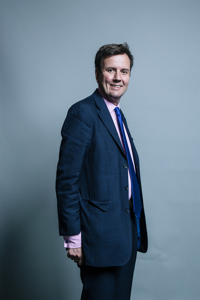

In [4]:
# Giving the first end point.
url1 = "https://members-api.parliament.uk/api/Location/Constituency/Search"
PARAMS = {'searchText':pincode}

# Extracting the information from the given url using the requests library.
r1 = requests.get(url=url1, params=PARAMS)
data = r1.json()

# Getting the first result from the first end point and we will use this as an input to second endpoint.
result1 = data['items'][0]['value']['currentRepresentation']['member']['links'][3]['href']

# From the first result we get the Name and Constituency.
Name = data['items'][0]['value']['currentRepresentation']['member']['value']['nameDisplayAs']
Constituency = data['items'][0]['value']['name']

# URL3 is the combination of url2 and the result from the first endpoint.
url2 = "https://members-api.parliament.uk/api"
url3 = url2+result1

# Extracting the information from the URL3.
r2 = requests.get(url3)
data1 = r2.json()

# From the second result we get the Email.
Email = data1['value'][0]['email']

res = result1[:13]
a = '/Portrait'
b = url2+res+a
img = Image.open(requests.get(b, stream=True).raw)
img1 = img.resize((200,300))
# Printing the result.
print("The MP details for the given Postcode are:\n\nName : %s\nConstituency : %s\nEmail : %s\n"%
      (Name, Constituency, Email))
img1